This script conducts validation tests on the smaller linear models for the Democratic primaries. I withhold one year at a time from the trianing data and then test on all elections from that year. I also create a new 'past_turnout' column for each validation model that does not incorporate the turnout from the year being tested. 

In [63]:
#Import packages
import pandas as pd
import re
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
pd.options.mode.chained_assignment = None 
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [64]:
#Download data
#Read in data and filter out test data
turnout_train_dem = pd.read_csv("turnout_train_dem.csv")



#filter out 2018 data
turnout_train_dem_use = turnout_train_dem[turnout_train_dem['Year'] != 2018]





R^2:  0.7588162452389136
Mean Absolute Error (MAE): 2.5564344765102622
Mean Squared Error (MSE): 12.17768178225354


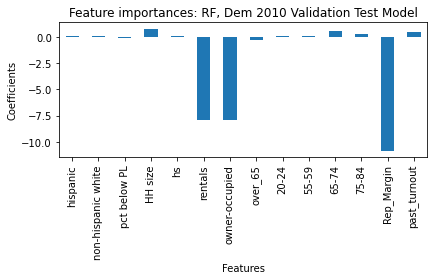

In [65]:
#Validation Test: 2010
np.random.seed(5)

turnout_train_dem_mod = turnout_train_dem_use

#create df for average of past turnout, except for 2018 and 2010.
history_dem = pd.read_csv('history_dem.csv')

history_dem = history_dem[(history_dem['Year'] != 2018) & (history_dem['Year'] != 2010)]
turnout_train_dem_record = history_dem[['Turnout', 'County']]
historical_dem = turnout_train_dem_record.groupby(['County']).mean()

#drop original past turnout column, which includes 2018 and 2010 in the means
turnout_train_dem_mod = turnout_train_dem_mod.drop(['past_turnout'], axis = 1)

#merge historical mean to test df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})
#Remove 2010 from testing data
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Year'] != 2010]

#extract feats and outcomes
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'pct below PL', 'HH size', 'hs', 'rentals', 'owner-occupied', 'over_65', '20-24', '55-59', '65-74', '75-84', 'Rep_Margin', 'past_turnout']]

model_outcome = turnout_train_dem_mod['Turnout']


#Create model
reg = LinearRegression()
reg.fit(model_feats, model_outcome);
pred = reg.predict(model_feats)

#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = reg.coef_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
plt.title("Feature importances: RF, Dem 2010 Validation Test Model")
plt.ylabel("Coefficients")
plt.xlabel("Features")
fig.tight_layout()


In [66]:
#Test 2010 gov

np.random.seed(5)


#drop original past turnout column, which includes 2018 and 2010 in the means
turnout_train_dem_mod = turnout_train_dem_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2010_Dem_Gov']

#specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'pct below PL', 'HH size', 'hs', 'rentals', 'owner-occupied', 'over_65', '20-24', '55-59', '65-74', '75-84', 'Rep_Margin', 'past_turnout']]

model_outcome = turnout_train_dem_mod['Turnout']

#Make predictions
pred = reg.predict(model_feats)


#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.4717345081244084
Mean Absolute Error (MAE): 4.5684905810423615
Mean Squared Error (MSE): 55.12523793440963


R^2:  0.6902767093401494
Mean Absolute Error (MAE): 3.154672115808242
Mean Squared Error (MSE): 20.26024338511137


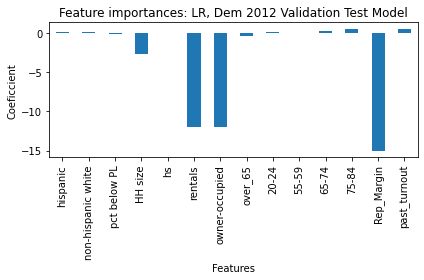

In [67]:
#Validation Test: 2012
np.random.seed(5)

turnout_train_dem_mod = turnout_train_dem_use

#create df for average of past turnout, except for 2018 and 2012.
history_dem = pd.read_csv('history_dem.csv')

history_dem = history_dem[(history_dem['Year'] != 2018) & (history_dem['Year'] != 2012)]
turnout_train_dem_record = history_dem[['Turnout', 'County']]
historical_dem = turnout_train_dem_record.groupby(['County']).mean()

#drop original past turnout column, which includes 2018 and 2010 in the means
turnout_train_dem_mod = turnout_train_dem_mod.drop(['past_turnout'], axis = 1)

#merge historical mean to test df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})
#Remove 2012 from testing data
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Year'] != 2012]

#extract feats and outcomes
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'pct below PL', 'HH size', 'hs', 'rentals', 'owner-occupied', 'over_65', '20-24', '55-59', '65-74', '75-84', 'Rep_Margin', 'past_turnout']]

model_outcome = turnout_train_dem_mod['Turnout']


#Create model
reg = LinearRegression()
reg.fit(model_feats, model_outcome);
pred = reg.predict(model_feats)

#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = reg.coef_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
plt.title("Feature importances: LR, Dem 2012 Validation Test Model")
plt.ylabel("Coeficcient")
plt.xlabel("Features")
fig.tight_layout()

In [68]:
#Test 2012 sen

np.random.seed(5)

#drop original past turnout column, which includes 2018 and 2012 in the means
turnout_train_dem_mod = turnout_train_dem_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2012_Dem_Sen']

#specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'pct below PL', 'HH size', 'hs', 'rentals', 'owner-occupied', 'over_65', '20-24', '55-59', '65-74', '75-84', 'Rep_Margin', 'past_turnout']]

model_outcome = turnout_train_dem_mod['Turnout']

#Make predictions
pred = reg.predict(model_feats)


#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.5687645963467383
Mean Absolute Error (MAE): 3.3376449094498164
Mean Squared Error (MSE): 17.00619519418454


In [69]:
#Test 2012 pres

np.random.seed(5)

#drop original past turnout column, which includes 2018 and 2012 in the means
turnout_train_dem_mod = turnout_train_dem_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2012_Dem_Pres']

#specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'pct below PL', 'HH size', 'hs', 'rentals', 'owner-occupied', 'over_65', '20-24', '55-59', '65-74', '75-84', 'Rep_Margin', 'past_turnout']]

model_outcome = turnout_train_dem_mod['Turnout']

#Make predictions
pred = reg.predict(model_feats)


#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.718556233413334
Mean Absolute Error (MAE): 3.258421131666661
Mean Squared Error (MSE): 18.366987114377235


R^2:  0.7062772455737811
Mean Absolute Error (MAE): 3.2589768981160168
Mean Squared Error (MSE): 20.57301079151788


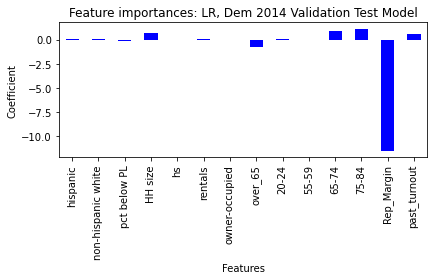

In [70]:
#Validation Test: 2014
np.random.seed(5)

turnout_train_dem_mod = turnout_train_dem_use

#create df for average of past turnout, except for 2018 and 2014.
history_dem = pd.read_csv('history_dem.csv')

history_dem = history_dem[(history_dem['Year'] != 2018) & (history_dem['Year'] != 2014)]
turnout_train_dem_record = history_dem[['Turnout', 'County']]
historical_dem = turnout_train_dem_record.groupby(['County']).mean()

#drop original past turnout column, which includes 2018 and 2012 in the means
turnout_train_dem_mod = turnout_train_dem_mod.drop(['past_turnout'], axis = 1)

#merge historical mean to test df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})
#Remove 2014 from testing data
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Year'] != 2014]

#extract feats and outcomes
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'pct below PL', 'HH size', 'hs', 'rentals', 'owner-occupied', 'over_65', '20-24', '55-59', '65-74', '75-84', 'Rep_Margin', 'past_turnout']]

model_outcome = turnout_train_dem_mod['Turnout']


#Create model
reg = LinearRegression()
reg.fit(model_feats, model_outcome);
pred = reg.predict(model_feats)

#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = reg.coef_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(color = 'blue')
plt.title("Feature importances: LR, Dem 2014 Validation Test Model")
plt.ylabel("Coefficient")
plt.xlabel("Features")
fig.tight_layout()

In [71]:
#Test 2014 gov

np.random.seed(5)
#drop original past turnout column, which includes 2018 and 2014 in the means
turnout_train_dem_mod = turnout_train_dem_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2014_Dem_Gov']

#specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'pct below PL', 'HH size', 'hs', 'rentals', 'owner-occupied', 'over_65', '20-24', '55-59', '65-74', '75-84', 'Rep_Margin', 'past_turnout']]

model_outcome = turnout_train_dem_mod['Turnout']

#Make predictions
pred = reg.predict(model_feats)


#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.6273432369734947
Mean Absolute Error (MAE): 3.213808515243541
Mean Squared Error (MSE): 16.718348877883948


In [72]:
#Test 2014 sen

np.random.seed(5)


#drop original past turnout column, which includes 2018 and 2014 in the means
turnout_train_dem_mod = turnout_train_dem_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2014_Dem_Sen']

#specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'pct below PL', 'HH size', 'hs', 'rentals', 'owner-occupied', 'over_65', '20-24', '55-59', '65-74', '75-84', 'Rep_Margin', 'past_turnout']]

model_outcome = turnout_train_dem_mod['Turnout']

#Make predictions
pred = reg.predict(model_feats)


#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.525412354020492
Mean Absolute Error (MAE): 3.250704547902508
Mean Squared Error (MSE): 17.297181640192964


R^2:  0.7074919725549791
Mean Absolute Error (MAE): 2.918220146331678
Mean Squared Error (MSE): 17.891300647363384


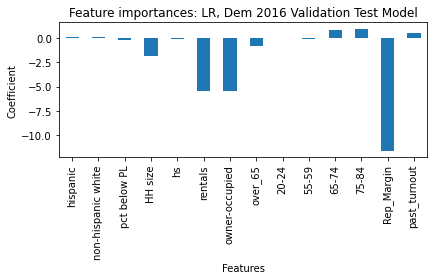

In [73]:
#Validation Test: 2014
np.random.seed(5)

turnout_train_dem_mod = turnout_train_dem_use

#create df for average of past turnout, except for 2018 and 2014.
history_dem = pd.read_csv('history_dem.csv')

history_dem = history_dem[(history_dem['Year'] != 2018) & (history_dem['Year'] != 2016)]
turnout_train_dem_record = history_dem[['Turnout', 'County']]
historical_dem = turnout_train_dem_record.groupby(['County']).mean()

#drop original past turnout column, which includes 2018 and 2012 in the means
turnout_train_dem_mod = turnout_train_dem_mod.drop(['past_turnout'], axis = 1)

#merge historical mean to test df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})
#Remove 2016 from testing data
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Year'] != 2016]

#extract feats and outcomes
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'pct below PL', 'HH size', 'hs', 'rentals', 'owner-occupied', 'over_65', '20-24', '55-59', '65-74', '75-84', 'Rep_Margin', 'past_turnout']]

model_outcome = turnout_train_dem_mod['Turnout']


#Create model
reg = LinearRegression()
reg.fit(model_feats, model_outcome);
pred = reg.predict(model_feats)

#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = reg.coef_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
plt.title("Feature importances: LR, Dem 2016 Validation Test Model")
plt.ylabel("Coefficient")
plt.xlabel("Features")
fig.tight_layout()

In [74]:
#Test 2014

np.random.seed(5)
#drop original past turnout column, which includes 2018 and 2014 in the means
turnout_train_dem_mod = turnout_train_dem_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2016_Dem_Pres']

#specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'pct below PL', 'HH size', 'hs', 'rentals', 'owner-occupied', 'over_65', '20-24', '55-59', '65-74', '75-84', 'Rep_Margin', 'past_turnout']]

model_outcome = turnout_train_dem_mod['Turnout']

#Make predictions
pred = reg.predict(model_feats)


#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.6475053185966937
Mean Absolute Error (MAE): 3.641788809573963
Mean Squared Error (MSE): 21.257188951510173
